In [2]:
import numpy as np
import scipy as sp
from matplotlib import pyplot as plt
%matplotlib inline

import random as rnd
import os
import math

# required for interactive plotting
from __future__ import print_function
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
import numpy.polynomial as np_poly

from IPython.display import Math
from IPython.display import Latex
from IPython.display import HTML

from pprint import pprint
import functools as ft

DIR_HOME = os.environ['HOME']
DIR_REPOS = DIR_HOME + "/neo-human/repos"
DIR_BMLSP = DIR_REPOS + "/luispedro/BuildingMachineLearningSystemsWithPython"

initialization
$
\newcommand{\Brace}[1]{\left\{#1\right\}}
\newcommand{\Bracket}[1]{\left[#1\right]}
\newcommand{\cases}[1]{\begin{cases}#1\end{cases}}
\newcommand{\cov}[1]{\text{cov} \sigma\left[#1\right]}
\newcommand{\diff}[2]{\frac{d #1}{d #2}}
\newcommand{\difftwo}[2]{\frac{d^2 #1}{d {#2}^2}}
\newcommand{\diffn}[2]{{#1}^{\prime}(#2)}
\newcommand{\ds}{\displaystyle}
\newcommand{\E}[1]{\mathbb{E}\left[ #1 \right]}
\newcommand{\expb}[1]{\exp\left\{#1\right\}} 
\newcommand{\EXP}[1]{\exp\left\{#1\right\}} 
\newcommand{\frachalf}[1]{\frac{#1}{2}~}
\newcommand{\fracone}[1]{\frac{1}{#1}~}
\newcommand{\fracrec}[1]{\frac{1}{#1}~}
\newcommand{\half}{\fracone{2}}
\newcommand{\H}[1]{\mathbb{H}\left[#1\right]}
\newcommand{\Int}[2]{\displaystyle \int_{#1}^{#2}~}
\newcommand{\intinfinf}{\Int{-\infty}{\infty}}
\newcommand{\inv}[1]{#1^{-1}}
\newcommand{\invp}[1]{\left({#1}\right)^{-1}}
\newcommand{\KL}[2]{\text{KL}\left(#1 \Vert #2\right)}
\newcommand{\Lim}[1]{\displaystyle \lim_{#1}}
\newcommand{\Ln}[1]{\ln \left\(#1\right\)}
\newcommand{\Lnb}[1]{\ln \left\{#1\right\} }
\newcommand{\Mod}[1]{\left|#1\right|}
\newcommand{\Norm}[1]{\left\lVert #1 \right\rVert}
\newcommand{\Normsqr}[1]{\Norm{#1}^2}
\newcommand{\map}[1]{#1_{\text{MAP}}}
\newcommand{\ml}[1]{#1_{\text{ML}}}
\newcommand{\MI}[1]{\mathcal{I}\left(#1\right)}
\newcommand{\P}{\mathbb{P}}
\newcommand{\Paran}[1]{\left(#1\right)}
\newcommand{\Partial}[2]{\frac{\partial #1}{\partial #2}}
\newcommand{\sqrbrkt}[1]{\Bracket{#1}^2}
\newcommand{\sqrbrc}[1]{\Brace{#1}^2}
\newcommand{\trace}[1]{\text{Tr}\left( #1 \right)}
\newcommand{\traceb}[1]{\text{Tr}\left\{#1\right\}}
\newcommand{\underl}[1]{\text{$\underline{#1}$}}
\newcommand{\V}[1]{\mathbb{V}\left[#1\right]}
$
$
\DeclareMathOperator*{\argmin}{arg\,min}
\DeclareMathOperator*{\argmax}{arg\,max}
$
$
\newcommand{\mat}[1]{ \left[ \begin{matrix} #1 \end{matrix} \right] }
\newcommand{\matp}[1]{ \left( \begin{matrix} #1 \end{matrix} \right)}
\newcommand{\mats}[1]{ \begin{matrix}#1\end{matrix} }
\newcommand{\arrthree}[1]{
\begin{array}{rlr} #1 \end{array}}
$

$
\newcommand{\C}{\mathbb{C}}
\newcommand{\Ca}{\mathcal{C}}
\newcommand{\Caone}{\Ca_1}
\newcommand{\Catwo}{\Ca_2}
\newcommand{\Cak}{\Ca_k}
\newcommand{\D}{\mathcal{D}}
\newcommand{\G}{\mathcal{G}}
\newcommand{\I}{\mathcal{I}}
\newcommand{\L}{\mathcal{L}}
\newcommand{\M}{\mathcal{M}}
\newcommand{\N}{\mathbb{N}}
\newcommand{\R}{\mathbb{R}}
\newcommand{\Ra}{\mathcal{R}}
$
$
\newcommand{\commentgray}[1]{\color{gray}{\text{#1}}}
$

sum, product
$
\newcommand{\sumi}{\displaystyle \sum_i}
\newcommand{\sumiD}{\displaystyle \sum_{i=1}^{D}}
\newcommand{\sumiL}{\displaystyle \sum_{i=1}^{L}}
\newcommand{\sumiN}{\displaystyle \sum_{i=1}^{N}}
\newcommand{\sumjD}{\displaystyle \sum_{j=1}^{D}}
\newcommand{\sumjK}{\displaystyle \sum_{j=1}^{K}}
\newcommand{\sumjMl}{\sum_{j=1}^{M-1}}
\newcommand{\sumkK}{\displaystyle \sum_{k=1}^{K}}
\newcommand{\sumkM}{\displaystyle \sum_{k=1}^{M}}
\newcommand{\sumkMl}{\sum_{k=1}^{M-1}}
\newcommand{\sumkp}{\displaystyle \sum_{k=1}^{p}}
\newcommand{\summN}{\displaystyle \sum_{m=1}^{N}}
\newcommand{\sumnN}{\displaystyle \sum_{n=1}^{N}}
$
$
\newcommand{\prodi}{\displaystyle \prod_i}
\newcommand{\prodiD}{\displaystyle \prod_{i=1}^{D}}
\newcommand{\prodiL}{\displaystyle \prod_{i=1}^{L}}
\newcommand{\prodiN}{\displaystyle \prod_{i=1}^{N}}
\newcommand{\prodjK}{\displaystyle \prod_{j=1}^{K}}
\newcommand{\prodkK}{\displaystyle \prod_{k=1}^{K}}
\newcommand{\prodmN}{\displaystyle \prod_{m=1}^{N}}
\newcommand{\prodnN}{\displaystyle \prod_{n=1}^{N}}
$

alphabet shortcuts
$
\newcommand{\ab}{\mathbf{a}}
\newcommand{\at}{\ab^T}
\newcommand{\Ab}{\mathbf{A}}
\newcommand{\At}{\Ab^T}
\newcommand{\Ai}{\inv{\Ab}}
\newcommand{\Abjk}{\Ab_{jk}}
\newcommand{\bb}{\mathbf{b}}
\newcommand{\bt}{\bb^T}
\newcommand{\Bb}{\mathbf{B}}
\newcommand{\Bt}{\Bb^T}
\newcommand{\Cb}{\mathbf{C}}
\newcommand{\Cn}{\Cb_{N}}
\newcommand{\Db}{\mathbf{D}}
\newcommand{\fb}{\mathbf{f}}
\newcommand{\fp}{f^{\prime}}
\newcommand{\Hb}{\mathbf{H}}
\newcommand{\hx}{h(\xb)}
\newcommand{\Jb}{\mathbf{J}}
\newcommand{\kb}{\mathbf{k}}
\newcommand{\kt}{\kb^T}
\newcommand{\Kb}{\mathbf{K}}
\newcommand{\Lb}{\mathbf{L}}
\newcommand{\Lt}{\Lb^T}
\newcommand{\Lbi}{\Lb^{-1}}
\newcommand{\mb}{\mathbf{m}}
\newcommand{\mt}{\mb^T}
\newcommand{\mbn}{\mb_N}
\newcommand{\mbnt}{\mbn^T}
\newcommand{\mbN}{\mb_N}
\newcommand{\mbNt}{\mbn^T}
\newcommand{\Mb}{\mathbf{M}}
\newcommand{\Qb}{\mathbf{Q}}
\newcommand{\Rb}{\mathbf{R}}
\newcommand{\sb}{\mathbf{s}}
\newcommand{\Sb}{\mathbf{S}}
\newcommand{\tb}{\mathbf{t}}
\newcommand{\tbnn}{\tb_{N}}
\newcommand{\tbnp}{\tb_{N+1}}
\newcommand{\tt}{\tb^T}
\newcommand{\Tb}{\mathbf{T}}
\newcommand{\Tt}{\Tb^T}
\newcommand{\ub}{\mathbf{u}}
\newcommand{\Ub}{\mathbf{U}}
\newcommand{\Ut}{\Ub^T}
\newcommand{\vb}{\mathbf{v}}
\newcommand{\Vb}{\mathbf{V}}
\newcommand{\wb}{\mathbf{w}}
\newcommand{\wnr}[1]{\wb^{(\text{#1})}}
\newcommand{\wt}{\wb^T}
\newcommand{\Wb}{\mathbf{W}}
\newcommand{\Wt}{\Wb^T}
\newcommand{\Wtilde}{\widetilde{\Wb}}
\newcommand{\Wtildet}{\Wtilde^T}
\newcommand{\Xb}{\mathbf{X}}
\newcommand{\Xt}{\Xb^T}
\newcommand{\Xk}{\Xb_k}
\newcommand{\Xkt}{\Xk^T}
\newcommand{\Xtilde}{\widetilde{\Xb}}
\newcommand{\Xtildet}{\Xtilde^T}
\newcommand{\xb}{\mathbf{x}}
\newcommand{\xt}{\xb^T}
\newcommand{\xtilde}{\widetilde{\xb}}
\newcommand{\xtilden}{\xtilde_n}
\newcommand{\xtildent}{\xtilden^T}
\newcommand{\xp}{x^{\prime}}
\newcommand{\xbp}{\xb^{\prime}}
\newcommand{\xbm}{\xb_m}
\newcommand{\xbn}{\xb_n}
\newcommand{\xbnp}{\xb_{N+1}}
\newcommand{\xab}{\mathbf{x_a}}
\newcommand{\xabt}{\mathbf{x_a}^T}
\newcommand{\xbb}{\mathbf{x_b}}
\newcommand{\xbbt}{\mathbf{x_b}^T}
\newcommand{\yb}{\mathbf{y}}
\newcommand{\yt}{\yb^T}
\newcommand{\yx}{y(\xb)}
\newcommand{\Yb}{\mathbf{Y}}
\newcommand{\Yt}{\Yb^T}
\newcommand{\zb}{\mathbf{z}}
\newcommand{\zt}{\zb^T}
\newcommand{\zbm}{\zb_m}
\newcommand{\zbn}{\zb_n}
\newcommand{\zbnp}{\zb_{n-1}}
\newcommand{\znk}{\zb_{nk}}
\newcommand{\znpj}{\zb_{n-1,j}}
\newcommand{\Zb}{\mathbf{Z}}
$

math shortcuts
$
\newcommand{\alphab}{\pmb{\alpha}}
\newcommand{\alphabt}{\alphab^T}
\newcommand{\betab}{\pmb{\beta}}
\newcommand{\betabp}{\betab^{\prime}}
\newcommand{\chib}{\boldsymbol{\chi}}
\newcommand{\etab}{\pmb{\eta}}
\newcommand{\etabp}{\etab^{\prime}}
\newcommand{\etat}{\eta^T}
\newcommand{\etabt}{\etab^T}
\newcommand{\Lambdab}{\pmb{\Lambda}}
\newcommand{\laa}{\Lambda_{aa}}
\newcommand{\laai}{\Lambda_{aa}^{-1}}
\newcommand{\lab}{\Lambda_{ab}}
\newcommand{\lba}{\Lambda_{ba}}
\newcommand{\lbb}{\Lambda_{bb}}
\newcommand{\lbbi}{\Lambda_{bb}^{-1}}
\newcommand{\li}{\Lambda^{-1}}
\newcommand{\Li}{\Lambda^{-1}}
\newcommand{\mub}{\pmb{\mu}}
\newcommand{\mut}{\mub^T}
\newcommand{\muab}{\pmb{\mu}_a}
\newcommand{\mubb}{\pmb{\mu}_b}
\newcommand{\Phib}{\pmb{\Phi}}
\newcommand{\Phibt}{\Phib^T}
\newcommand{\pib}{\pmb{\pi}}
\newcommand{\sigmasqr}{\sigma^2}
\newcommand{\saa}{\Sigma_{aa}}
\newcommand{\sab}{\Sigma_{ab}}
\newcommand{\sba}{\Sigma_{ba}}
\newcommand{\sbb}{\Sigma_{bb}}
\newcommand{\Sigmai}{\inv{\Sigma}}
\newcommand{\thetab}{\pmb{\theta}}
\newcommand{\thetat}{\thetab^T}
\newcommand{\thetabh}{\hat{\thetab}}
\newcommand{\thetaold}{\thetab^{\text{old}}}
$
$
\newcommand{\zerob}{\pmb{0}}
\newcommand{\oneb}{\pmb{1}}
\newcommand{\ed}{\mathbb{E}_{\D}}
\newcommand{\edyx}{\ed\left[y(\xb ; \D)\right]}
\newcommand{\dx}{~dx}
\newcommand{\dxb}{~d\xb}
\newcommand{\pxdxb}{p(\xb) \dxb}
\newcommand{\dwb}{~d\wb}
$

aliases for distributions
$\newcommand{\multivarcoeff}{\frac{1}{(2\pi)^{D/2}}
\frac{1}{\left| \mathbf{\Sigma}\right|^{1/2}}}$
$\newcommand{\multivarexp}[2]
{
\left\{
 -\frac{1}{2} 
 {#1}^T 
 #2
 {#1}
\right\}
}$
$\newcommand{\multivarexpx}[1]{\multivarexp{#1}{\Sigma^{-1}}}$
$\newcommand{\multivarexpstd}{\multivarexpx{(\xb-\mub)}}$
$\newcommand{\gam}{\operatorname{Gam}}$
$
\newcommand{\Nl}[3]{\mathcal{N}\left(#1 \mid #2, #3\right)}
\newcommand{\Nstdx}{\Nl{\mathbf{x}}{\mathbf{\mu}}{\Sigma}}
$

# learning numpy

## arange

In [3]:
a = np.arange(6)
print(a)
print('dim: ', a.ndim, ' shape: ', a.shape)

[0 1 2 3 4 5]
dim:  1  shape:  (6,)


## reshape

In [4]:
b = a.reshape(3,-1)
print(b)
print('dim: ', b.ndim, ' shape: ', b.shape)

[[0 1]
 [2 3]
 [4 5]]
dim:  2  shape:  (3, 2)


## modify and copy

Changing b will change a

In [5]:
b[1][0] = 77
print('b\n', b)
print('a', a)

b
 [[ 0  1]
 [77  3]
 [ 4  5]]
a [ 0  1 77  3  4  5]


so do a copy before modify, if thats necessary

In [6]:
c = a.reshape(3,2).copy()
print('c\n', c)

c
 [[ 0  1]
 [77  3]
 [ 4  5]]


In [7]:
c[1][0] = 77
print('c\n', c)
print('a', a)

c
 [[ 0  1]
 [77  3]
 [ 4  5]]
a [ 0  1 77  3  4  5]


## broadcasting

In [8]:
a = np.arange(10, step=2)
print('a:    ', a)
print('2a:   ', a * 2)
print('a**3: ', a ** 3)

a:     [0 2 4 6 8]
2a:    [ 0  4  8 12 16]
a**3:  [  0   8  64 216 512]


## indexing

In [9]:
print(a[[2,3,4]])

[4 6 8]


In [10]:
print('a>4', a>4)

a>4 [False False False  True  True]


In [11]:
print('a[a>4]: ', a[a>4])

a[a>4]:  [6 8]


In [12]:
a[a>4] = 4
print('a: ', a)

a:  [0 2 4 4 4]


In [13]:
a = np.arange(10, step=2)
print('a: ', a)
print('clip(0,4): ', a.clip(0,4))
print('a: ', a)

a:  [0 2 4 6 8]
clip(0,4):  [0 2 4 4 4]
a:  [0 2 4 6 8]


## handling non-existing values

In [14]:
c = np.array([1,2,np.NAN, 3,4])
print('c: ', c)

c:  [  1.   2.  nan   3.   4.]


In [15]:
print(np.isnan(c))

[False False  True False False]


In [16]:
print('c[non-nan]: ', c[~np.isnan(c)])

c[non-nan]:  [ 1.  2.  3.  4.]


## runtimes

In [17]:
import timeit

normal_py_sec = timeit.timeit('sum(x*x for x in range(1000))',
                              number=10000)

naive_np_sec = timeit.timeit(
    'sum(na*na)',
    setup="import numpy as np; na=np.arange(1000)",
    number=10000)

good_np_sec = timeit.timeit(
    'na.dot(na)',
    setup="import numpy as np; na=np.arange(1000)",
    number=10000)

print("Normal Python: %f sec" % normal_py_sec)
print("Naive NumPy: %f sec" % naive_np_sec)
print("Good NumPy: %f sec" % good_np_sec)


Normal Python: 0.880111 sec
Naive NumPy: 0.882598 sec
Good NumPy: 0.016811 sec


Quite interesting.  
Didn't know that **a*a** is slower than **a.dot(a)**

> One reason for this is that the access
of individual elements from Python itself is rather costly. Only when we are able
to apply algorithms inside the optimized extension code is when we get speed
improvements.

# learning scipy

# Our first application

2016-04-29 09:55:39 

## reading and cleaning

In [18]:
data = sp.genfromtxt(DIR_BMLSP+"/ch01/data/web_traffic.tsv",delimiter="\t")
print(data.shape)
x, y = data[:,0], data[:,1]
print('#nans: ', len(y[np.isnan(y)]))
print('#nans: ', sp.sum(sp.isnan(y)))
print('#nans: ', np.sum(np.isnan(y)))

x = x[~sp.isnan(y)]
y = y[~sp.isnan(y)]
print('#nans: ', np.sum(np.isnan(y)))


(743, 2)
#nans:  8
#nans:  8
#nans:  8
#nans:  0


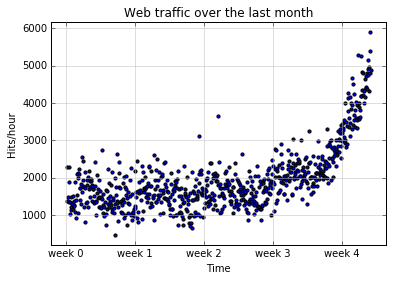

In [19]:
# plot the (x,y) points with dots of size 10
def plot_web_traffic(x, y):
    plt.scatter(x, y, s=10, label='traffic')
    plt.title("Web traffic over the last month")
    plt.xlabel("Time")
    plt.ylabel("Hits/hour")
    plt.xticks([w*7*24 for w in range(10)],
               ['week %i' % w for w in range(10)])
    plt.autoscale(tight=True)
    # draw a slightly opaque, dashed grid
    plt.grid(True, linestyle='-', color='0.75')
    
plot_web_traffic(x, y)
plt.show()

## fitting polynomials

In [20]:
def error(f1, x, y):
    return sp.sum((f1(x)-y)**2)

def fit_polynomial(x, y, degree=1, debug=False):
    fp, residuals, rank, sv, rcond = sp.polyfit(x, y, degree, full=True)
    if debug:
        print('Model parameters: ', fp, 'Residuals: ', residuals)
    fp = sp.poly1d(fp)
    return fp

def plot_polynomial(fp, x_last=None):
    x_last = x_last or x[-1]
    print(x_last)
    fx = sp.linspace(0, x_last, 1000)
    plt.plot(fx, fp(fx), linewidth=2, label='d=%i' % fp.order)


### 1d polynomial

1043.0


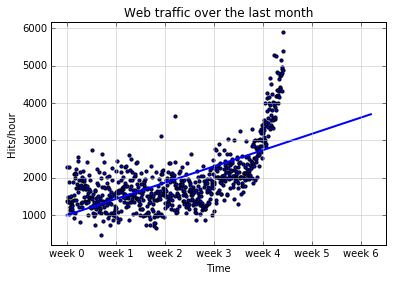

In [21]:
plot_web_traffic(x, y)
plot_polynomial(fit_polynomial(x, y, 1), x[-1]+300)
plt.show()

In [22]:
print((True and 1) or 55)

1


### the big thing

743.0


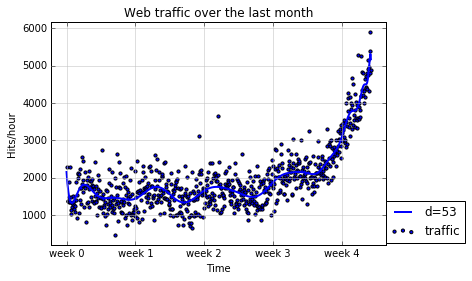

In [23]:
def plot_web_traffic_fits(degree=53, plot_all=False, debug=False, extrapolate=False):
    plot_web_traffic(x, y)
    degrees = range(10) if plot_all else [degree]
    [plot_polynomial(fit_polynomial(x, y, degree, debug),
                     x[-1]+50 if extrapolate else x[-1])
     for degree in degrees]
    plt.legend(loc=(1,0.01))
    ylims = plt.ylim()
    y_min = (ylims[0]>=0    and ylims[0]) or 0
    y_max = (ylims[1]<=7000 and ylims[1]) or 7000
    plt.ylim([y_min, y_max])
    plt.show()
    
interactive(plot_web_traffic_fits, degree=(1,60))

## taking a step back,

We can see that there is a inflection point at around week 3.5  
we can fit one model for data before and one after week 3.5

see the book [p 23] for more

## reverse shot!

lets try to find when we reach the traffic of 100,000 hits

In [38]:
# fit and plot a model using the knowledge about inflection point
inflection = int(3.5 * 7 * 24)
xa = x[:inflection]
ya = y[:inflection]
xb = x[inflection:]
yb = y[inflection:]

In [39]:
# separating training from testing data
frac = 0.3
split_idx = int(frac * len(xb))
shuffled = sp.random.permutation(list(range(len(xb))))
test = sorted(shuffled[:split_idx])
train = sorted(shuffled[split_idx:])

In [40]:
fbt2 = sp.poly1d(sp.polyfit(xb[train], yb[train], 2))
print('fbt2\n', fbt2)

from scipy.optimize import fsolve
reached_max = fsolve(fbt2-100000, x0=800)/(7*24)
print('we can expect 100,000 hits after %f weeks ' % reached_max)

fbt2
         2
0.0815 x - 88.06 x + 2.547e+04
we can expect 100,000 hits after 9.753565 weeks 


# summary

Admittedly, the use of polynomial fitting is not the coolest thing in the machine
learning world. We have chosen it to not distract you by the coolness of some
shiny algorithm when we conveyed the two most important messages we just
summarized earlier.
